In [3]:
!pip install prophet




  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.65-py3-none-any.whl.metadata (26 kB)
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.7 kB 330.3 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.7 kB 262.6 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 336.4 kB/s eta 0:00:00
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached holidays-0.65-py3-none-any.whl (1.2 MB)
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   --------------- --------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\jatin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\jatin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jatin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [5]:

df = pd.read_csv('C:\\Users\\jatin\\OneDrive\\Desktop\\yug_some\\air-pollution-time-series-analysis\\AirQualityUCI.csv',sep = ';')


In [6]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H.%M.%S")


c6h6 = [float(x.replace(',', '.')) for x in df["C6H6(GT)"].to_list()]

In [7]:
data = {
    'ds': df['datetime'],
    'y' : c6h6
}
data = pd.DataFrame(data)
data['ds'] = pd.to_datetime(data['ds'])


In [13]:
m = Prophet(daily_seasonality=True)
m.fit(data)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)

20:37:06 - cmdstanpy - INFO - Chain [1] start processing
20:37:08 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


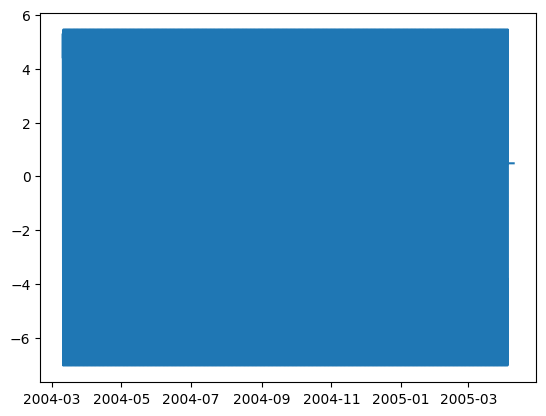

In [23]:

plt.plot(forecast["ds"], forecast['daily'])

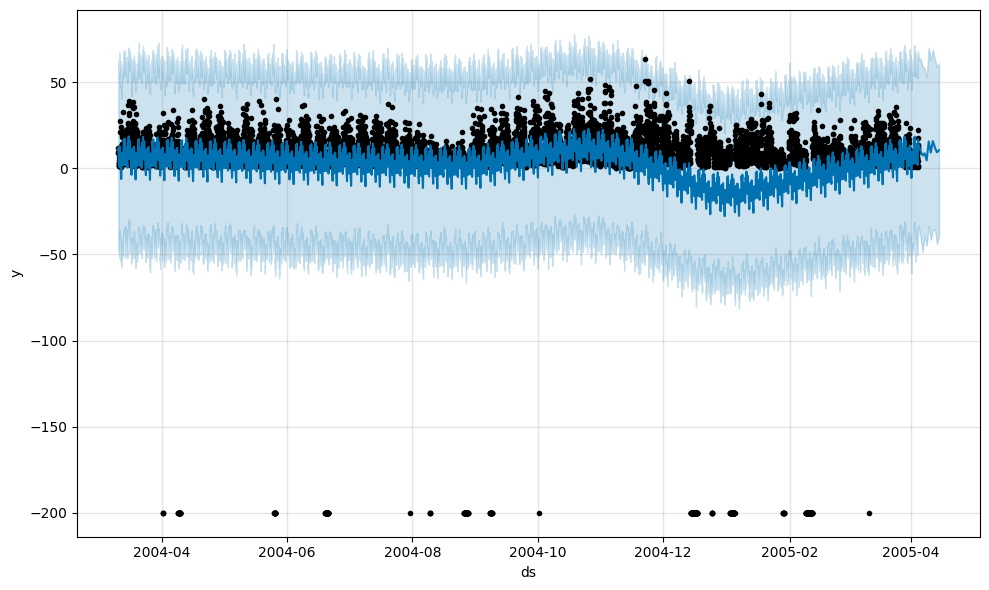

In [11]:
m.plot(forecast)
plt.show()